In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split


In [14]:
X, y = make_blobs(
    n_samples = 100000,
    n_features= 3, 
    centers = 2, 
    cluster_std = 7, 
    random_state =42
  )

In [15]:
x_train, x_test , y_train , y_test = train_test_split( X, y , stratify= y , random_state= 42)

In [16]:
model = SVC(probability= True, max_iter=500)
model.fit(x_train, y_train)

C:\Users\Surface\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=500, probability=True)

In [17]:
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12500
           1       0.81      0.86      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [18]:
tpr,fpr, threshold = roc_curve(y_test, y_pred)
roc_auc =auc(fpr, tpr)

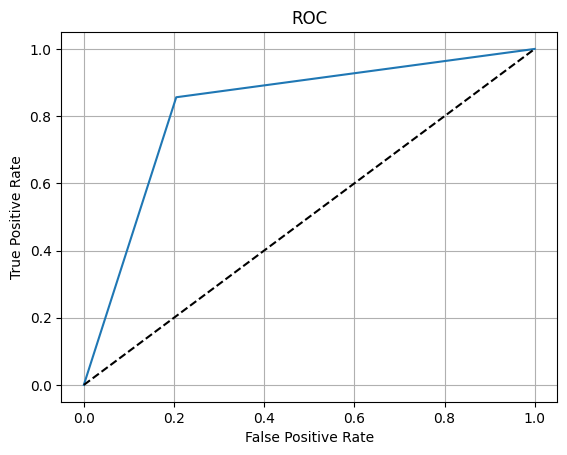

In [25]:
plt.plot(tpr, fpr , label ="roc_auc(AUC =%0.3f "% roc_auc)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(True)
plt.show()